In [1]:
import pandas as pd
import numpy as np

In [2]:
job_skill=pd.read_csv(r'E:/job_skills/job_skills.csv')

In [3]:
job_skill.head()


,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [4]:
job_skill.tail()

,job_link,job_skills
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome..."
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health..."
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ..."
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R..."
1296380,https://www.linkedin.com/jobs/view/conductor-e...,"Customer Service, Driving, Loading, Unloading,..."


In [5]:
job_skill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   job_link    1296381 non-null  object
 1   job_skills  1294296 non-null  object
dtypes: object(2)
memory usage: 19.8+ MB


In [6]:
job_skill.describe()

,job_link,job_skills
count,1296381,1294296
unique,1296381,1287101
top,https://www.linkedin.com/jobs/view/housekeeper...,"Front Counter, DriveThru, Outside Order Taker,..."
freq,1,169


In [7]:
job_skill.isna().sum()

job_link         0
job_skills    2085
dtype: int64

In [8]:
job_skill=job_skill.dropna()

In [9]:
job_skill['skill_count'] = job_skill['job_skills'].str.split(', ').apply(len)
job_skill

,job_link,job_skills,skill_count
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor...",14
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ...",19
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis...",20
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche...",35
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St...",11
...,...,...,...
1296376,https://www.linkedin.com/jobs/view/community-a...,"Communication Skills, Time Management, Custome...",9
1296377,https://www.linkedin.com/jobs/view/sr-it-analy...,"Windows SQL, EDI X12, Edifecs Platform, Health...",26
1296378,https://www.linkedin.com/jobs/view/operations-...,"Adaptability, Communication, Digital Fluency, ...",17
1296379,https://www.linkedin.com/jobs/view/float-patie...,"CNA, EMT, BLS, Medical Assistant, CPCT, LPN, R...",32


In [10]:
# Using list comprehension to generate a string of all job skills in lowercase
skills = ' '.join(skill.lower() for skill in job_skill.job_skills)

# Display the result if necessary
skills = skills.split(', ')
skills[:20], len(skills)


(['building custodial services',
  'cleaning',
  'janitorial services',
  'materials handling',
  'housekeeping',
  'sanitation',
  'waste management',
  'floor maintenance',
  'equipment maintenance',
  'safety protocols',
  'communication skills',
  'attention to detail',
  'physical strength',
  'experience in housekeeping customer service',
  'restaurant management',
  'food safety',
  'training',
  'supervision',
  'scheduling',
  'inventory'],
 25630959)

In [11]:
from collections import Counter

counts = Counter(skills)    
most_required_skills = counts.most_common(25)

# Display the results in a more readable format
for skill, count in most_required_skills:
    print(f"{skill}: {count}")


communication: 352814
teamwork: 218291
customer service: 193452
communication skills: 178349
leadership: 159455
problem solving: 145024
time management: 138281
attention to detail: 128414
problemsolving: 125690
project management: 102663
interpersonal skills: 96272
patient care: 95204
collaboration: 84096
training: 79805
data analysis: 77863
organizational skills: 72800
inventory management: 69547
microsoft office suite: 67598
sales: 64872
scheduling: 62788
high school diploma: 60622
multitasking: 60202
analytical skills: 58728
adaptability: 56231
bachelor's degree: 55631


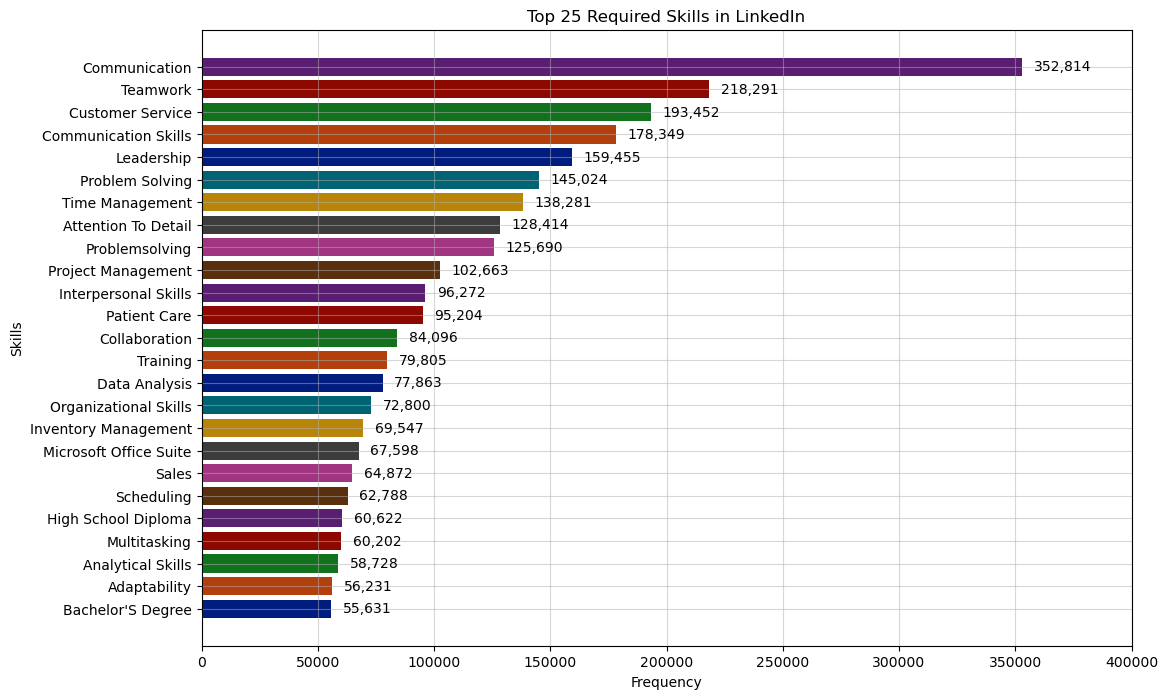

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'common_skills' is a list of tuples (skill, count)
labels, values = zip(*most_required_skills)

# Title casing for the labels
labels = [label.title() for label in labels]

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("dark"))

# Adding value labels to the bars with formatting
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 5000  # Position the label slightly away from the bar
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center', color='Black')

# Set labels and title
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 25 Required Skills in LinkedIn', color='Black')

# Display grid lines for better readability
plt.grid(axis='both', linestyle='-', alpha=0.5)

# Set x-axis limit
plt.xlim(0, 400_000)

# Show the plot
plt.show()


In [13]:
df_skills = pd.DataFrame(most_required_skills, columns=['Skill', 'Frequency'])
df_skills.to_csv('most_required_skills.csv', index=False)
df_skills.to_excel('most_required_skills.xlsx', index=False)
print("Exported the top 100 skills to 'most_required_skills.csv' and 'most_required_skills.xlsx'.")

Exported the top 100 skills to 'most_required_skills.csv' and 'most_required_skills.xlsx'.
